#**Data Privacy: Computer Homework 01**


Sharif Univesity of  Technology - EE dept.

by Prof. Yassaee, Fall 2023

Khashayar Ghaffari | 98100215

*Release Date:* 7 Azar 1402

*Soft Deadline:* 21 Azar 1402 - 23:55

*Hard Deadline:* 25 Azar 1402 - 23:55



---



# *Question 1*: In this question we want to demonstrate membership inference attacks on means by test statistics



First, tuneable simulation parameters:

In [ ]:
import numpy as np
from scipy import stats
import math
np.random.seed(123)

n_sim=1000
n_samples=10
k_att=100

Then, define utility functions for simulating data and calculating the test statistics:


In [ ]:
def synthesize(population_prob, n=1):


#test statistics:
def test_homer(alice, sample_mean, population_mean):
  test_statistic= sum (abs()-abs())


def test_dwork(alice, sample_mean, population_mean):



def null_distribution (funny, population_prob, population_mean, null_sims=1000, alpha=0.05)




Create Simple graph function for showing the distribution, partitioned by critical value, then Simulate and graph a null distribution:

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html


Now create a complete simulation of attack. We are going to iterate across datasets, calculate the discrimination of the test statistic among observations in the private data and the null population.

In [ ]:
history = np.zeros(shape(n_sim,4))

nulldist_homer()
nulldist_dwork()



---



# *Question 2:* Now Let's bulid  Laplace Mechanism for Differential Privacy

First, construct the basic building blocks for a Laplace mechanism, a random sampler from the distribution, a clamp/clip/censor function, the function for the true mean, and then the DP release algorithm itself.

In [19]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt

In [6]:
#Laplace:
def Laplace(shift, scale, size):
    return np.random.laplace(loc=shift, scale=scale, size=size)


#Clamp:
def Clamp(x, bounds):
    lower = bounds[0]
    upper = bounds[1]
    return np.clip(x, lower, upper)


#bounded mean:
def bounded_mean(x, bounds):
    return np.mean(Clamp(x, bounds))


#dp mean:
def release_dp_mean(x, epsilon, bounds):
    n = len(x)
    sensitivity = (bounds[1]-bounds[0])/n 
    return bounded_mean(x, bounds) + Laplace(0, sensitivity/epsilon, size=None)


Read in the data.  We're going to use the PUMS dataset, and focus on the education variable, a 16 point scale:

In [14]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/opendp/cs208/main/spring2022/data/FultonPUMS5full.csv")

n = len(data)
bounds = (1, 16)
educ = data['educ'].values.astype(float)
print("real mean: " , np.mean(educ))
print("DP mean: " , release_dp_mean(educ, 1, bounds))

real mean:  10.608553908251183
DP mean:  10.60854586372753


Now that we have a mechanism available, let's try a new one, the histogram.  Histograms give counts of the number of observations within defined partitions of the variable domain.  Consider carefully the sensitivity for the histogram, which depends on which definition of neighbouring we are using. After that,  call your privacy-preserving histogram.

In [15]:
def release_histogram(x, epsilon, categories):
  sensitivity = 1

  counts = dict(zip(*np.unique(x, return_counts=True)))

  sensitivity_histogram = []

  for i in categories:
    sensitivity_histogram.append(counts.get(i, 0))

  sensitivity_histogram = np.array(sensitivity_histogram)

  return sensitivity_histogram + Laplace(0, sensitivity/epsilon, size=sensitivity_histogram.shape)


print(release_histogram(educ, 1, range(1,17)))    

[ 271.79157208  141.56739905  354.48768682  469.82117858  496.6724838
  756.39853696  894.44593886 1060.63830455 5150.48707741 1392.26312062
 3962.62144305 1154.63658234 6283.43070654 2267.70906404  794.61678339
  308.84932572]


Now we want to to simulate repeated draws from the Laplace mechanism to examine the utility it offers over the range of epsilon values and dataset sizes, for our education variable. We'll need a way to construct new datasets, given we only have one available.  The (nonparametric) bootstrap function lets us construct datasets even larger than our original source data if needed, by treating the sample data as if it is a population from which we can resample.

In [33]:
def bootstrap(x, n):
  return np.random.choice(x, n)

n_sim = np.random.randint(150, 1150, 20)
eps_sim = np.random.rand(5)

n_sim = sorted(n_sim)
eps_sim = sorted(eps_sim) 

errors = []

for n_i in n_sim:
  for eps_i in eps_sim:
    tot_err = 0
    for k in range(n_i):
      sim_data = bootstrap(educ, n_i)
      real_mean = np.mean(sim_data)
      dp_mean = release_dp_mean(sim_data, eps_i, [1,16])
      tot_err += (real_mean - dp_mean)**2

    errors.append([n_i, eps_i, np.sqrt(tot_err/n_i)])



error_df = pd.DataFrame(errors, columns=["N", "epsilon", "error"])

print(error_df)


       N   epsilon     error
0    197  0.281587  0.371794
1    197  0.324396  0.314705
2    197  0.401243  0.283333
3    197  0.565893  0.210622
4    197  0.811311  0.122751
..   ...       ...       ...
95  1141  0.281587  0.069949
96  1141  0.324396  0.055104
97  1141  0.401243  0.044217
98  1141  0.565893  0.030629
99  1141  0.811311  0.022752

[100 rows x 3 columns]


Now graph your resluts!

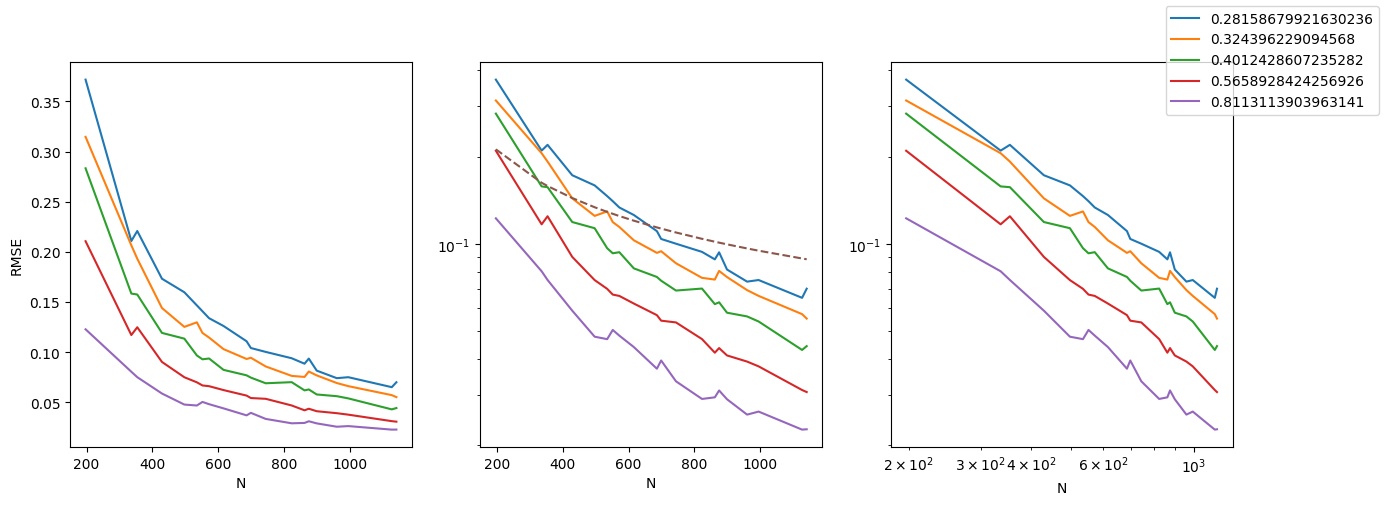

In [37]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5)) 

axs[0].set_ylabel("RMSE")
axs[1].set_yscale("log")
axs[2].set_xscale("log")
axs[2].set_yscale("log")

for epsilon_sim, subhistory in error_df.groupby("epsilon"):
    for ax in axs:
        subhistory.plot(x="N", y="error", label=epsilon_sim, ax=ax, legend=None)

se = np.std(educ) / np.sqrt(n_sim)
axs[1].plot(n_sim, se, linestyle='dashed')
fig.legend(*axs[0].get_legend_handles_labels())



---



# *Question 3:* OPENDP

The OpenDP Project is a community effort to build trustworthy, open source software tools for analysis of private data. The core software of the OpenDP Project is the OpenDP Library.

The OpenDP Library is a modular collection of statistical algorithms that adhere to differential privacy. The library is based on a conceptual framework described in [A Programming Framework for OpenDP](https://projects.iq.harvard.edu/files/opendp/files/opendp_programming_framework_11may2020_1_01.pdf).

The OpenDP Library can be found on GitHub: https://github.com/opendp/opendp/

OpenDP represents computations with Transformations and Measurements. First, recall all you need from opendp, then create a measurement that simply addds laplace noise and like a function.

In [63]:
from opendp.meas import *
from opendp.trans import *
from opendp.typing import *
from opendp.mod import enable_features, Transformation, Measurement
enable_features("contrib", "floating-point")

base_laplace: Measurement = make_base_laplace(scale=0.5)

# call the measurement like a function
base_laplace(arg=23.)

# create a mean transformation
n = educ.shape[0]
sized_bounded_mean: Transformation = make_sized_bounded_mean(size=n, bounds=(1., 16.))

# call the transformation like a function
sized_bounded_mean(arg=educ)

7042878440.0

We can also chain transformations and measurements. You might already think of chaining as function composition. The reason why we call it "chaining," instead of "composition," is because composition has a special meaning in differential privacy. In the context of differential privacy, composition refers to the joint release of more than one measurement.

In [64]:
# chain with the base_laplace measurement
dp_mean: Measurement = sized_bounded_mean >> base_laplace

# release a dp mean
dp_mean(arg=educ)

7042878439.759517

Now that we've shown how to build up computations and execute them, lets talk about distances.

Transformations and Measurements relate distances. There are three kinds of distances:

1. Dataset distances  
    (greatest distance between neighboring datasets)
1. Sensitivities  
    (greatest distance between queries on neighboring datasets)
1. Privacy budget    
    (greatest distance between the probability distributions)

The following shows how the `base_laplace` measurement relates a `sensitivity` to a privacy budget, `epsilon`.

In [65]:
# Check that when sensitivity is 0.15, the privacy usage is .30
base_laplace.check(d_in=.15, d_out=.30)

True

We can interpret this as: If the sensitivity is .15, then we could release the query answer with `laplace(scale=.5)` noise at a privacy expenditure of `.3 epsilon`. Equivalently, this data release is `.3 differentially private`, or `.3-DP`, where the privacy units are implicitly in terms of epsilon.

If we were to increase the sensitivity, the same relation would fail, and the release would not be `.3-DP`.

In [67]:
base_laplace.check(d_in=.17, d_out=.31)

False

As you might expect, the relation will also pass for any sensitivity that is smaller, or any privacy expenditure that is larger. And similarly, the `sized_bounded_mean` transformation relates a dataset distance `max_influence` to a `sensitivity`.

In [68]:
sized_bounded_mean.check(d_in=1, d_out=.15)

True

Now relate distances on chained computations. The units for the input and output distances come from the constituent transformations and measurements.

For example, when we chain the `sized_bounded_mean` transformation and `base_laplace` measurement together, the input distance is a dataset distance, `max_influence`, and the output distance is measured in terms of a privacy budget, `epsilon`.

The `release_histogram` function behaves similarly to the `make_count_by_categories` function in OpenDP.

In [ ]:
help(make_count_by_categories)

In [ ]:
# release a histogram with laplace noise


In [ ]:
# release a histogram with geometric noise




---



# *Question 4:* Gaussian Mechanism

Let's extend the basic building blocks to include a Gaussian mechanism and a random sampler from the Gaussian.

In [41]:
#Gaussian
def Gaussian(shift, scale, size=None): 
    return np.random.normal(shift, scale, size)

#Clamp:
def Clamp(x, bounds):
    lower = bounds[0]
    upper = bounds[1]
    return np.clip(x, lower, upper)


#bounded mean:
def bounded_mean(x, bounds):
    return np.mean(Clamp(x, bounds))

#dp mean:
def release_dp_mean_gaussian(x, epsilon, bounds):
    delta = 1e-6
    n = len(x)
    sensitivity = (bounds[1]-bounds[0])/n
    scale = (sensitivity / epsilon) * np.sqrt(2*np.log(2/delta)) 
    return bounded_mean(x, bounds) + Gaussian(0, scale)

Read in the data. We are using the familiar PUMS dataset we are familiar with, and focusing on the education variable, a 16 point scale.

In [44]:
import pandas as pd
data = pd.read_csv(
    "https://raw.githubusercontent.com/opendp/cs208/main/spring2022/data/FultonPUMS5full.csv")

n = len(data)
bounds = (1, 16)
educ = data['educ'].values.astype(float)
print("real mean: " , np.mean(educ))
print("DP mean: " , release_dp_mean_gaussian(educ, 1, bounds))    

real mean:  10.608553908251183
DP mean:  10.611921178633501


Now simulate repeated draws from both mechanisms to compare the utility they offer over a range of epsilon values and dataset sizes.  

In [45]:
def bootstrap(x, n):
  return np.random.choice(x, n)

n_sim = np.random.randint(150, 1150, 20)
eps_sim = np.random.rand(5)

n_sim = sorted(n_sim)
eps_sim = sorted(eps_sim) 

errors = []

for n_i in n_sim:
  for eps_i in eps_sim:
    tot_err = 0
    for k in range(n_i):
      sim_data = bootstrap(educ, n_i)
      real_mean = np.mean(sim_data)
      dp_mean = release_dp_mean_gaussian(sim_data, eps_i, [1,16])
      tot_err += (real_mean - dp_mean)**2

    errors.append([n_i, eps_i, np.sqrt(tot_err/n_i)])



error_df = pd.DataFrame(errors, columns=["N", "epsilon", "error"])

print(error_df)


       N   epsilon      error
0    223  0.003474  98.378332
1    223  0.102808   3.653965
2    223  0.208609   1.687754
3    223  0.270812   1.403441
4    223  0.567841   0.613827
..   ...       ...        ...
95  1121  0.003474  20.655142
96  1121  0.102808   0.717409
97  1121  0.208609   0.346937
98  1121  0.270812   0.269151
99  1121  0.567841   0.125257

[100 rows x 3 columns]


And Finally Graph your result:

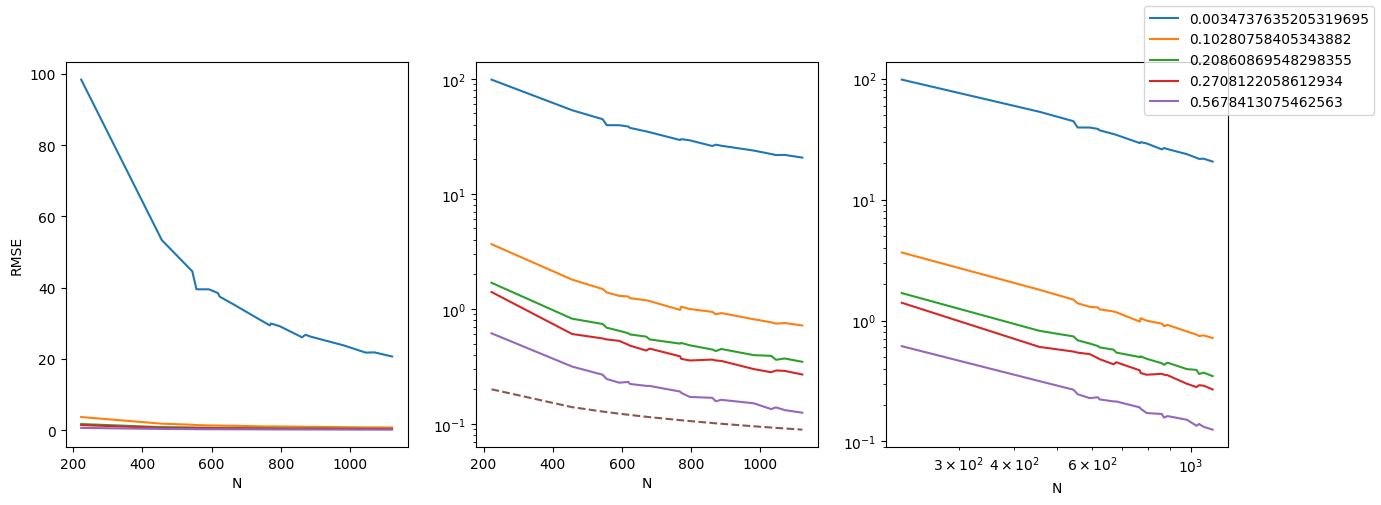

In [46]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5)) 

axs[0].set_ylabel("RMSE")
axs[1].set_yscale("log")
axs[2].set_xscale("log")
axs[2].set_yscale("log")

for epsilon_sim, subhistory in error_df.groupby("epsilon"):
    for ax in axs:
        subhistory.plot(x="N", y="error", label=epsilon_sim, ax=ax, legend=None)

se = np.std(educ) / np.sqrt(n_sim)
axs[1].plot(n_sim, se, linestyle='dashed')
fig.legend(*axs[0].get_legend_handles_labels())